# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**DORCAS, ODUOR**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In [1]:
!pip install comet_ml

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=d37e4fe8d29db70b75a5954f56ccb8b8ffdd71f9f094d6558c4cf5d8b68b1122
  Stored in directory: c:\users\dorcas oduor\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=96c45461f46220b5fe96d8e17875491be6f1238e01f6f3316f6ebbc1f3158dda
  Stored in directory: c:\users\dorcas oduor\appdata\local\pip\cache\wheels\34\2a\24\a490264ae9041fd48f778ff393526572c80bb498ddecb07ea5
Successfully built nvidia-ml-py3 configobj


In [21]:
from comet_ml import Experiment

In [22]:
experiment = Experiment(
    api_key="cbtJsKjDivb61gTUBXpeo48r7",
    project_name="classification-predict-streamlit-group3",
    workspace="michael-py",
)
experiment.display()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/michael-py/classification-predict-streamlit-group3/bf805bb51ae04793af74b454ac3faeb5
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiti

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [23]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# For model perfomance assesment.
from sklearn.metrics import classification_report

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [24]:
df = pd.read_csv(r'C:\Users\Dorcas Oduor\Documents\EDSA\Advanced Classification\Predict\Predict Data\train.csv')
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [25]:
df_train = df.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [26]:
# look at data statistics
df_train.shape

(15819, 3)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [28]:
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [29]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Text(0.5, 1.0, 'Class Distributions')

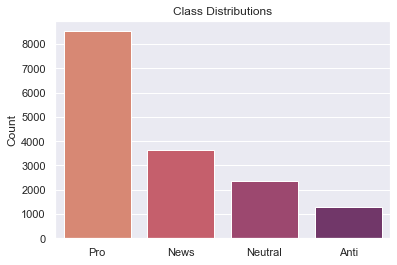

In [30]:
# Visualising the Distribution of tweets per sentiment
 
class_distribution = pd.DataFrame(list(df_train['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, 
           palette="flare")
plt.title('Class Distributions')

Text(0, 0.5, 'Density')

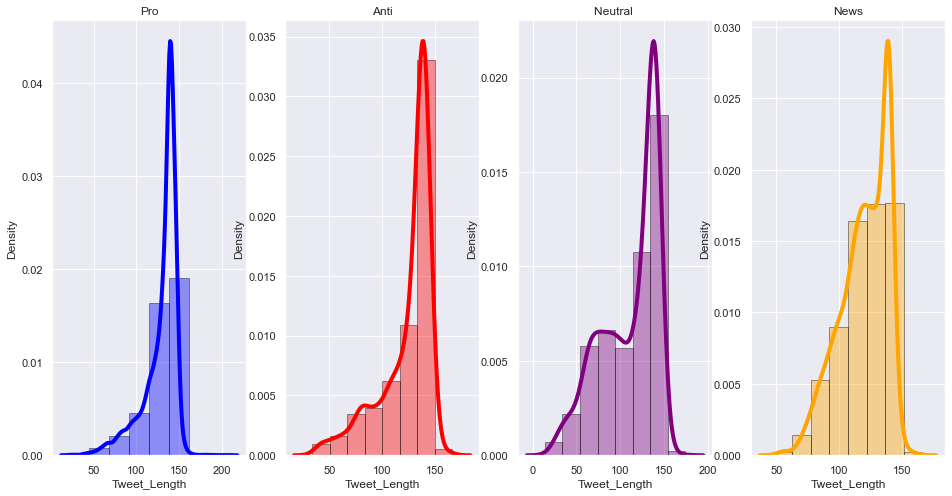

In [31]:
# Distribution plots for the labels
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#Pro 
sns.distplot(df_train[df_train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Pro')
ax1.set_xlabel('Tweet_Length')
ax1.set_ylabel('Density')

#Anti 
sns.distplot(df_train[df_train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Anti')
ax2.set_xlabel('Tweet_Length')
ax2.set_ylabel('Density')

#Neutral 
sns.distplot(df_train[df_train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('Tweet_Length')
ax3.set_ylabel('Density')

#News
sns.distplot(df_train[df_train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'orange', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('Tweet_Length')
ax4.set_ylabel('Density')

In [34]:
# Analysing Tweets by users
# Extracting Usersnames in a column
df_train['usernames'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in df_train.message]

# Generating Counts of messages and grouping by usernames
user_counts = df_train[['message', 'usernames']].groupby('usernames', as_index=False).count().sort_values(by='message', ascending=False)

user_counts.head()

,usernames,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


In [35]:
# Labeling the target variable
df_train['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in df_train['sentiment']]

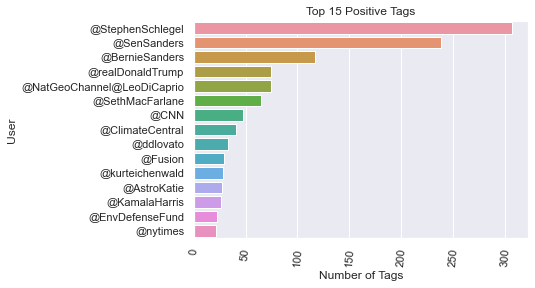

<Figure size 1080x576 with 0 Axes>

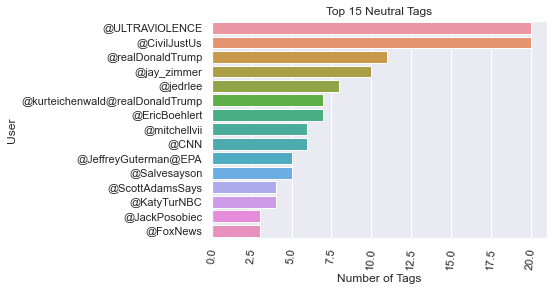

<Figure size 1080x576 with 0 Axes>

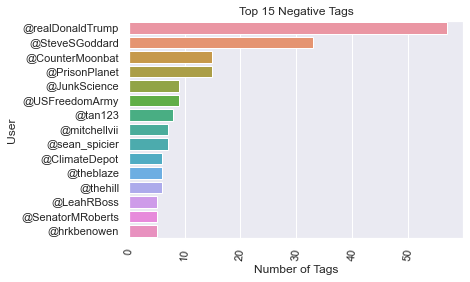

<Figure size 1080x576 with 0 Axes>

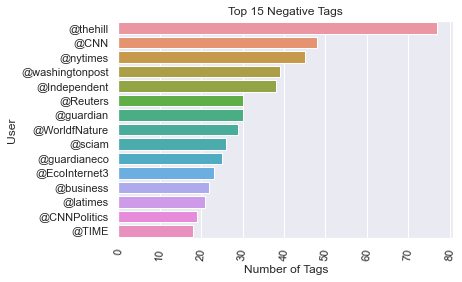

<Figure size 1080x576 with 0 Axes>

In [41]:
#Analysing tweet counts and sentiments by username
sns.countplot(y ="usernames", data = df_train[df_train['sentiment'] == 'Positive'],
              order=df_train[df_train['sentiment'] == 'Positive'].usernames.value_counts().iloc[:15].index) 

plt.xlabel('Number of Tags')
plt.ylabel('User')
plt.title('Top 15 Positive Tags')
plt.xticks(rotation=85)
plt.figure(figsize = (15,8))
plt.show()

sns.countplot(y ="usernames", data = df_train[df_train['sentiment'] == 'Neutral'],
              order=df_train[df_train['sentiment'] == 'Neutral'].usernames.value_counts().iloc[:15].index) 

plt.xlabel('Number of Tags')
plt.ylabel('User')
plt.title('Top 15 Neutral Tags')
plt.xticks(rotation=85)
plt.figure(figsize = (15,8))
plt.show()

sns.countplot(y ="usernames", data = df_train[df_train['sentiment'] == 'Negative'],
              order=df_train[df_train['sentiment'] == 'Negative'].usernames.value_counts().iloc[:15].index) 

plt.xlabel('Number of Tags')
plt.ylabel('User')
plt.title('Top 15 Negative Tags')
plt.xticks(rotation=85)
plt.figure(figsize = (15,8))
plt.show()

sns.countplot(y ="usernames", data = df_train[df_train['sentiment'] == 'News'],
              order=df_train[df_train['sentiment'] == 'News'].usernames.value_counts().iloc[:15].index) 

plt.xlabel('Number of Tags')
plt.ylabel('User')
plt.title('Top 15 Negative Tags')
plt.xticks(rotation=85)
plt.figure(figsize = (15,8))
plt.show()

In [130]:
# have a look at feature distributions

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [131]:
# remove missing values/ features
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [132]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [133]:
#making everything lowercase
df_train['message'] = df_train['message'].str.lower()

In [134]:
#removing punctuations
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [135]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [136]:
df_train['message'] = df_train['message'].apply(remove_punctuation)

In [137]:
df_train.head(20)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
5,1,worth a read whether you do or dont believe in...,425577
6,1,rt thenation mike pence doesn’t believe in glo...,294933
7,1,rt makeandmendlife six big things we can all d...,992717
8,1,aceofspadeshq my 8yo nephew is inconsolable he...,664510
9,1,rt paigetweedy no offense… but like… how do yo...,260471


In [138]:
df_train.tail(20)

,sentiment,message,tweetid
15799,1,rt sethmacfarlane hrc proposes installing half...,52528
15800,1,rt sapinker the only practical way to avert cl...,580806
15801,1,rt sensanders on virtually every major issue ã...,331127
15802,2,michael bloomberg to world leaders ignore trum...,585908
15803,2,suicides of nearly 60000 indian farmers linked...,296403
15804,1,rt cathdweeb me with full knowledge of global ...,386076
15805,2,rt grindtv new head of epa says climate change...,830383
15806,-1,rt herbermp sness5561ness al gore is a idiot h...,213863
15807,1,scottpruit climate change comments would be li...,447067
15808,0,rt thepowersthatbe now if she could only be co...,127777


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [176]:
#Vectorisation
data = df_train['message']

Vect = CountVectorizer(lowercase=True, stop_words='english', max_features=100,analyzer='word', ngram_range=(1, 3))
Vect.fit(data)
X_count = Vect.fit_transform(data.values.astype(str))

In [177]:
X_count.shape

(15819, 100)

In [178]:
X = X_count.toarray()

In [179]:
# create targets and features dataset
y = df_train['sentiment']

In [180]:
from sklearn.model_selection import train_test_split
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [181]:
# create one or more ML models
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.50      0.00      0.01       254
           0       0.43      0.01      0.01       457
           1       0.61      0.89      0.73      1736
           2       0.62      0.56      0.59       717

    accuracy                           0.61      3164
   macro avg       0.54      0.36      0.33      3164
weighted avg       0.58      0.61      0.53      3164



In [190]:
#Testing our data
df_test = pd.read_csv(r'C:\Users\Dorcas Oduor\Documents\EDSA\Advanced Classification\Predict\Predict Data\test.csv')
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [193]:
# remove missing values/ features
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [194]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,The scary unimpeachable evidence that climate ...,224985
3,Karoli morgfair OsborneInk dailykos \nPutin go...,476263
4,RT FakeWillMoore Female orgasms cause global w...,872928


In [199]:
Vect = CountVectorizer(lowercase=True, stop_words='english', max_features=100,analyzer='word', ngram_range=(1, 3))
Vect.fit(data)
X_count_test = Vect.fit_transform(df_test['message'] .values.astype(str))

In [200]:
X_pred = X_count_test.toarray()

In [201]:
Y_pred_2 = svc.predict(X_pred)

In [202]:
df_test['sentiment'] = Y_pred_2

In [208]:
df_test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,The scary unimpeachable evidence that climate ...,224985,1
3,Karoli morgfair OsborneInk dailykos \nPutin go...,476263,1
4,RT FakeWillMoore Female orgasms cause global w...,872928,1


In [210]:
df_final = df_test.drop('message', axis = 'columns')

In [211]:
df_final.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [212]:
df_final.to_csv(r'C:\Users\Dorcas Oduor\Documents\EDSA\Advanced Classification\Predict\Predict Data\lr Model.csv', index = False)

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic